# Programming Exercise 4: Neural Networks Learning (_in progress_)
# 1 Neural Networks
## 1.1 Visualizing the data

In [1]:
import scipy.io

data = scipy.io.loadmat('../matlab/ex4data1.mat')
print data.keys()

['y', 'X', '__version__', '__header__', '__globals__']


In [2]:
X = data['X']
y = data['y']
print X.shape
print y.shape

(5000, 400)
(5000, 1)


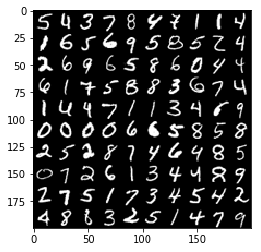

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
% matplotlib inline

im = Image.new('I', (200, 200))
np.random.seed(1234)
for i, rowid in enumerate(np.random.randint(0, 5000, 100)):
    im.paste(Image.fromarray(X[rowid, :].reshape((20, 20)).T * 256), ((i / 10) * 20, (i % 10) * 20))
plt.imshow(im)

## 1.2 Model representation
![title](../../ex3/python/fig2.png)
## 1.3 Feedforward and cost function
$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} [ -y_k^{(i)} \log (h_\theta(x^{(i)})_k) - (1 - y_k^{(i)}) \log (1 - h_\theta(x^{(i)})_k) ]$

In [4]:
def sigmoid(z):
    ### YOUR CODE HERE ###


    ######################


def add_ones(X):
    m, _ = X.shape
    return np.column_stack((np.ones((m, 1)), X))

def cost(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_):
    m, _ = X.shape
    Theta1_len = hidden_layer_size * (input_layer_size + 1)
    Theta1 = nn_params[:Theta1_len].reshape((hidden_layer_size, input_layer_size + 1))
    Theta2 = nn_params[Theta1_len:].reshape((num_labels, hidden_layer_size + 1))
    ### YOUR CODE HERE ###




    ######################
    return J

In [5]:
data = scipy.io.loadmat('../matlab/ex4weights.mat')
print data.keys()

['Theta2', '__version__', '__header__', 'Theta1', '__globals__']


In [6]:
Theta1 = data['Theta1']
Theta2 = data['Theta2']
print Theta1.shape
print Theta2.shape

nn_params = np.concatenate((Theta1.flatten(), Theta2.flatten()))
input_layer_size  = 400;  # 20x20 Input Images of Digits
hidden_layer_size = 25;   # 25 hidden units
num_labels = 10;          # 10 labels, from 1 to 10
lambda_ = 0

J = cost(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_)
print J

(25, 401)
(10, 26)
0.287629165161


## 1.4 Regularized cost function
$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} [ -y_k^{(i)} \log (h_\theta(x^{(i)})_k) - (1 - y_k^{(i)}) \log (1 - h_\theta(x^{(i)})_k) ] + \frac{\lambda}{2m} [\sum_{j=1}^{25} \sum_{k=1}^{400} (\Theta_{j,k}^{(1)})^2 + \sum_{j=1}^{10} \sum_{k=1}^{25} (\Theta_{j,k}^{(2)})^2]$

In [7]:
lambda_ = 1
J = cost(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_)
print J

0.383769859091


# 2 Backpropagation
## 2.1 Sigmoid gradient

In [8]:
def sigmoid_gradient(z):
    ### YOUR CODE HERE ###


    ######################


print sigmoid_gradient(0)
print sigmoid_gradient(np.array([-1, 0, 1]))

0.25
[ 0.19661193  0.25        0.19661193]


## 2.2 Random initialization

In [9]:
def rand_initialize_weights(L_in, L_out):
    epsilon_init = 0.12
    W = np.random.rand(L_in, L_out) * 2 * epsilon_init - epsilon_init
    return W

print rand_initialize_weights(2, 3)

[[ 0.04560389  0.11773796  0.04572824]
 [ 0.10754957  0.02007472  0.00757278]]


## 2.3 Backpropagation
![title](fig3.png)